# Understanding Lego sets popularity

Now let's now move on to the competition and challenge.

## 📖 Background
You recently applied to work as a data analyst intern at the famous Lego Group in Denmark. As part of the job interview process, you received the following take-home assignment:

You are asked to use the provided dataset to understand the popularity of different Lego sets and themes. The idea is to become familiarized with the data to be ready for an interview with a business stakeholder.

![erd](data/lego_erd.png)

## 💾 The data

#### You received access to a database with the following tables. You can also see above a visualization of how the tables are related to each other. ([source](https://rebrickable.com/downloads)):

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Create a visualization for item 2.
4. What are the 5 most popular colors used in Lego parts?
5. [Optional] What proportion of Lego parts are transparent?
6. [Optional] What are the 5 rarest lego bricks?
7. Summarize your findings.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

**1. What is the average number of Lego sets released per year?**
 
 177

In [24]:
SELECT ROUND(AVG(per_year)) as avg_sets_released
FROM (SELECT COUNT(set_num) as per_year
	  FROM sets
	  GROUP BY year) as sub;


,avg_sets_released
0,177


**2. What is the average number of Lego parts per year?**

In [25]:
SELECT year, ROUND(AVG(num_parts)) as parts
FROM sets
GROUP BY year
ORDER BY year;

,year,parts
0,1950,10
1,1953,17
2,1954,12
3,1955,37
4,1956,19
...,...,...
61,2013,181
62,2014,170
63,2015,202
64,2016,253


**3. Create a visualization for item 2**

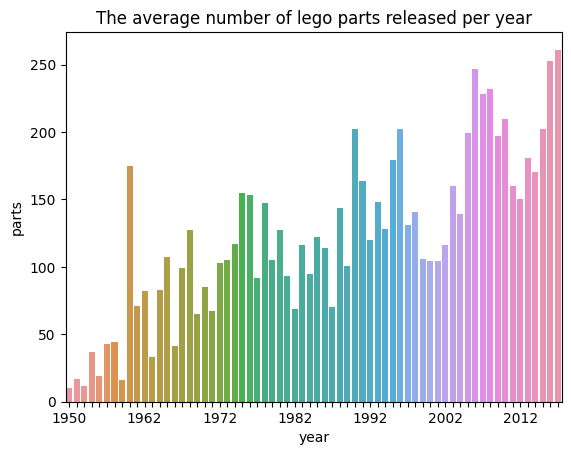

In [26]:
fig, ax = plt.subplots()
g1 = sns.barplot(data=avg_parts_released, y='parts', x='year', ax=ax)
g1.set(title='The average number of lego parts released per year')
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

**4. What are the 5 most popular colors used in Lego parts?**

Black, red, white, light bluish gray, then dark bluish gray are the most common colors for different inventory items as seen below. 


In [27]:
WITH common_colors AS (SELECT color_id, COUNT(part_num) as count
				FROM inventory_parts
				GROUP BY color_id
				ORDER BY count DESC
				LIMIT 5)
SELECT name, count 
FROM common_colors, colors
WHERE common_colors.color_id = colors.id;

,name,count
0,Black,115085
1,Red,50213
2,White,66536
3,Light Bluish Gray,55302
4,Dark Bluish Gray,43907


However, if we were to take into account the varying quantities of copies of each inventory item...

In [28]:
WITH common_colors AS (SELECT color_id, SUM(quantity) as count
				FROM inventory_parts
				GROUP BY color_id
				ORDER BY count DESC
				LIMIT 5)
SELECT name, count 
FROM common_colors, colors
WHERE common_colors.color_id = colors.id;

,name,count
0,Black,396416
1,Red,169983
2,White,221553
3,Light Bluish Gray,201858
4,Dark Bluish Gray,148584


We would get the same answer!

**5. [Optional] What proportion of Lego parts are transparent?**

6.3%

In [29]:
SELECT ROUND(AVG(CASE WHEN is_trans = 'True' THEN 1 ELSE 0 END), 3)
FROM inventory_parts
LEFT JOIN colors
ON inventory_parts.color_id = colors.id;

,round
0,0.063


**6. [Optional] What are the 5 rarest lego bricks?**

In order from the rarest: Technic Bricks, Bricks, Bricks Special, Bricks Wedged, Bricks Round and Cones. 

In [30]:
WITH bricks AS(SELECT id, name
			   FROM part_categories as p2
			   WHERE name LIKE '%rick%'),
num_from_id AS(SELECT p.part_num, b.id, b.name
			   FROM parts as p
			   INNER JOIN bricks as b
			   ON p.part_cat_id = b.id
			   WHERE p.part_cat_id IN(b.id))
SELECT name, COUNT(part_num)
FROM num_from_id
GROUP BY name
ORDER BY count
LIMIT 5;


,name,count
0,Technic Bricks,26
1,Bricks,93
2,Bricks Special,116
3,Bricks Wedged,198
4,Bricks Round and Cones,219
